In [1]:
# Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data

In [4]:
data = pd.read_csv('HousePricePrediction.xlsx - Sheet1.csv')

In [5]:
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [7]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [8]:
obj = (data.dtypes == 'object')
print(obj)
print('****************************')
print(obj[obj])
print('****************************')
print(obj[obj].index)
print('****************************')
print(len(obj[obj].index))

Id              False
MSSubClass      False
MSZoning         True
LotArea         False
LotConfig        True
BldgType         True
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st      True
BsmtFinSF2      False
TotalBsmtSF     False
SalePrice       False
dtype: bool
****************************
MSZoning       True
LotConfig      True
BldgType       True
Exterior1st    True
dtype: bool
****************************
Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')
****************************
4


In [9]:
int_ = (data.dtypes == 'int64')
print(int_)
print('****************************')
print(int_[int_])
print('****************************')
print(int_[int_].index)
print('****************************')
print(len(int_[int_].index))

Id               True
MSSubClass       True
MSZoning        False
LotArea          True
LotConfig       False
BldgType        False
OverallCond      True
YearBuilt        True
YearRemodAdd     True
Exterior1st     False
BsmtFinSF2      False
TotalBsmtSF     False
SalePrice       False
dtype: bool
****************************
Id              True
MSSubClass      True
LotArea         True
OverallCond     True
YearBuilt       True
YearRemodAdd    True
dtype: bool
****************************
Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')
****************************
6


In [10]:
float_ = (data.dtypes == 'float64')
print(float_)
print('****************************')
print(float_[float_])
print('****************************')
print(float_[float_].index)
print('****************************')
print(len(float_[float_].index))

Id              False
MSSubClass      False
MSZoning        False
LotArea         False
LotConfig       False
BldgType        False
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st     False
BsmtFinSF2       True
TotalBsmtSF      True
SalePrice        True
dtype: bool
****************************
BsmtFinSF2     True
TotalBsmtSF    True
SalePrice      True
dtype: bool
****************************
Index(['BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'], dtype='object')
****************************
3


In [11]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [12]:
data.drop('Id', inplace = True, axis = 1)

In [13]:
data

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   int64  
 1   MSZoning      2915 non-null   object 
 2   LotArea       2919 non-null   int64  
 3   LotConfig     2919 non-null   object 
 4   BldgType      2919 non-null   object 
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2918 non-null   object 
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 273.8+ KB


In [15]:
data['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [16]:
data['SalePrice'].isnull().sum()

1459

In [17]:
data['SalePrice'] = data['SalePrice'].fillna(data['SalePrice'].mean())

In [18]:
data['SalePrice']

0       208500.00000
1       181500.00000
2       223500.00000
3       140000.00000
4       250000.00000
            ...     
2914    180921.19589
2915    180921.19589
2916    180921.19589
2917    180921.19589
2918    180921.19589
Name: SalePrice, Length: 2919, dtype: float64

In [19]:
data['SalePrice'].isnull().sum()

0

In [20]:
data.isnull().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [21]:
data.dropna(inplace = True)

In [22]:
data.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [23]:
# EDA - Exploratory Data Analysis

# Find the correlation of the data.

In [24]:
data.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000,2913.000000
mean,57.190182,10137.665980,5.566770,1971.391349,1984.314452,49.667353,1052.805012,180921.195890
std,42.538067,7832.598853,1.108977,30.258751,20.864950,169.338330,439.688510,56232.174632
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7476.000000,5.000000,1954.000000,1965.000000,0.000000,793.000000,163000.000000
50%,50.000000,9450.000000,5.000000,1973.000000,1993.000000,0.000000,990.000000,180921.195890
75%,70.000000,11553.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,180921.195890
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [25]:
data_corr = data.corr()

C:\Users\maste\AppData\Local\Temp\ipykernel_12580\2216729752.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


In [26]:
data_corr

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
MSSubClass,1.000000,-0.202661,-0.066033,0.033428,0.042057,-0.072839,-0.222397,-0.059326
LotArea,-0.202661,1.000000,-0.025024,0.031226,0.027047,0.085927,0.262102,0.237990
OverallCond,-0.066033,-0.025024,1.000000,-0.375150,0.043586,0.040980,-0.180554,-0.055299
YearBuilt,0.033428,0.031226,-0.375150,1.000000,0.611755,-0.028329,0.407691,0.369442
YearRemodAdd,0.042057,0.027047,0.043586,0.611755,1.000000,-0.062818,0.294832,0.355167
BsmtFinSF2,-0.072839,0.085927,0.040980,-0.028329,-0.062818,1.000000,0.089027,-0.007672
TotalBsmtSF,-0.222397,0.262102,-0.180554,0.407691,0.294832,0.089027,1.000000,0.433343
SalePrice,-0.059326,0.237990,-0.055299,0.369442,0.355167,-0.007672,0.433343,1.000000


In [27]:
# Data visualization:

<Axes: >

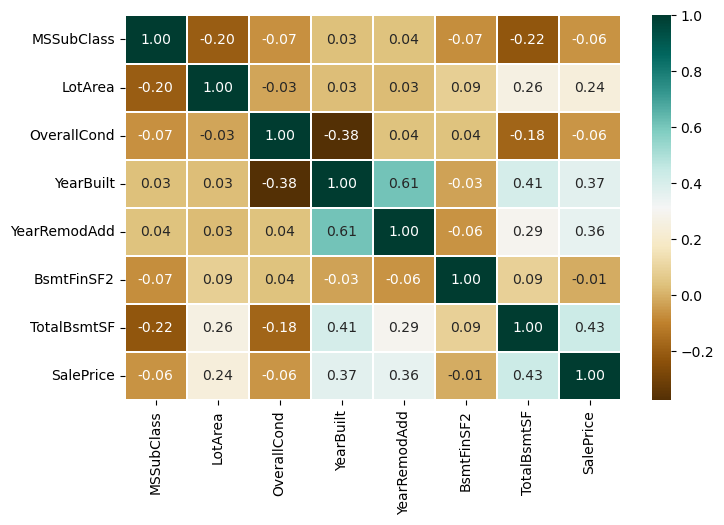

In [28]:
# 1. Heatmap
plt.figure(figsize = (8,5))
sns.heatmap(data_corr, cmap = 'BrBG', annot = True, fmt = '.2f', linewidth = 0.2)

In [29]:
# help(sns.heatmap)

In [30]:
# To understand the categorical features, we will plot a barplot.

In [31]:
obj_col = list(obj[obj].index)

In [32]:
obj_col

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [33]:
unique_val = []
for o in obj_col:
    unique_val.append(data[o].unique().size)

In [34]:
unique_val

[5, 5, 5, 15]

In [35]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [36]:
data['MSZoning'].value_counts()

RL         2264
RM          459
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [37]:
data['LotConfig'].value_counts()

Inside     2128
Corner      511
CulDSac     176
FR2          85
FR3          13
Name: LotConfig, dtype: int64

In [38]:
data['BldgType'].value_counts()

1Fam      2419
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [39]:
data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     449
HdBoard     442
Wd Sdng     409
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      43
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
ImStucc       1
CBlock        1
Name: Exterior1st, dtype: int64

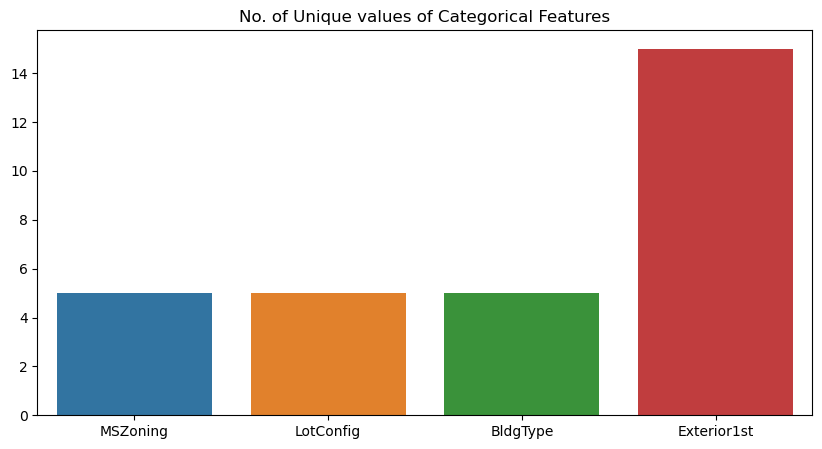

In [40]:
plt.figure(figsize = (10,5))
sns.barplot(x = obj_col, y = unique_val)
plt.title('No. of Unique values of Categorical Features')
# plt.xticks(rotation=45)
plt.show()

In [41]:
# help(plt.bar)

In [42]:
# Plot of each count separately with their counts

C:\Users\maste\AppData\Local\Temp\ipykernel_12580\2728045469.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(10, 4, index)


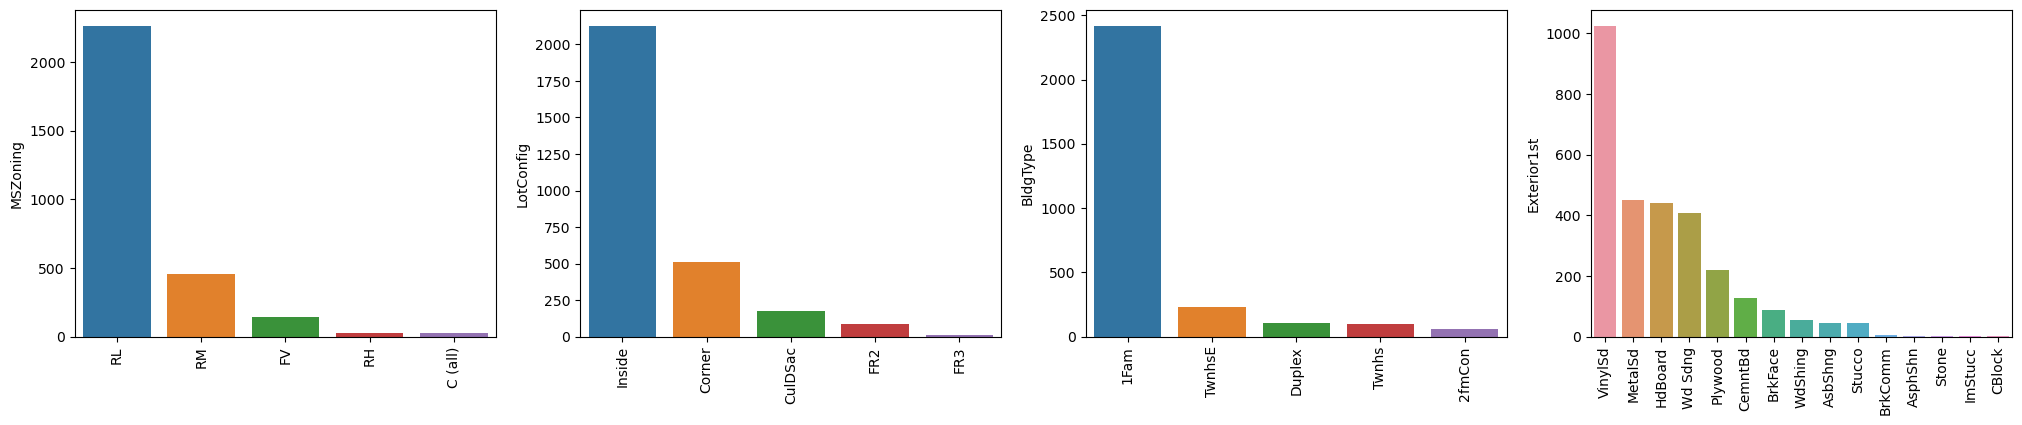

In [43]:
plt.figure(figsize = (25,50))
plt.title('Categorical features and their counts')
plt.xticks(rotation = 45)
index = 1

for col in obj_col:
    y = data[col].value_counts()
    plt.subplot(10, 4, index)
    plt.xticks(rotation = 90)
    sns.barplot(x = list(y.index), y = y)
    index += 1

In [44]:
data

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,180921.19589
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


In [45]:
a = data.dtypes == 'object'
print(a)
print('********************************')
print(a[a])

MSSubClass      False
MSZoning         True
LotArea         False
LotConfig        True
BldgType         True
OverallCond     False
YearBuilt       False
YearRemodAdd    False
Exterior1st      True
BsmtFinSF2      False
TotalBsmtSF     False
SalePrice       False
dtype: bool
********************************
MSZoning       True
LotConfig      True
BldgType       True
Exterior1st    True
dtype: bool


In [46]:
obj_lst = list(a[a].index)

In [47]:
obj_lst

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [48]:
# preprocessing the data for ML

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
ohe = OneHotEncoder(sparse = False)

In [110]:
# help(OneHotEncoder)

In [52]:
ohe_col = pd.DataFrame(ohe.fit_transform(data[obj_lst]))

C:\Users\maste\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [53]:
ohe_col

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2909,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2910,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2911,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
ohe_col.index = data.index

In [55]:
ohe_col.columns = ohe.get_feature_names_out()

In [56]:
ohe_col.columns

Index(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'],
      dtype='object')

In [57]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [58]:
ohe_col

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
final_data = data.drop(obj_lst, axis = 1)

In [60]:
final_data

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,8450,5,2003,2003,0.0,856.0,208500.00000
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000
2,60,11250,5,2001,2002,0.0,920.0,223500.00000
3,70,9550,5,1915,1970,0.0,756.0,140000.00000
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589


In [61]:
data

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,180921.19589
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


In [62]:
ohe_col

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
final_data = pd.concat([final_data, ohe_col], axis = 1)

In [66]:
final_data

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
data = final_data
data

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Splitting the data to train the data. 

In [69]:
from sklearn.model_selection import train_test_split

In [72]:
data.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'],
      dtype='object')

In [73]:
X = data[['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing']]

y = data['SalePrice']

In [78]:
# help(train_test_split)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)

In [79]:
# Using the supervised ML models to check the accuracy. Majorly there are 3 SML models for regression data, they are,
# 1. Linear regression
# 2. Random Forest
# 3. SVM (Support Vector Machine)
# Checking all the methods to find the model with the highest accuracy. 

### 1. Linear regression

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr = LinearRegression()

In [83]:
lr.fit(X_train, y_train)

LinearRegression()

In [99]:
ypred_lr = lr.predict(X_test)

In [86]:
# ypred

In [ ]:
# Calculating the accuracy of the Linear Regression model using mean squared error (MSE):

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [101]:
# help(mean_squared_error)
mean_squared_error(y_test, ypred_lr)

2034170673.3855915

In [92]:
mean_absolute_percentage_error(y_test, ypred_lr)

0.20082555321531023

### 2. Random forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
# help(RandomForestRegressor)

In [94]:
rfr = RandomForestRegressor()

In [98]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [102]:
ypred_rfr = rfr.predict(X_test)

In [104]:
mean_absolute_percentage_error(y_test, ypred_rfr)

0.20019723712926518

### 3. SVM - Support Vector Machine using SVR

In [105]:
from sklearn.svm import SVR

In [106]:
svr = SVR()

In [107]:
svr.fit(X_train, y_train)

SVR()

In [108]:
ypred_svr = svr.predict(X_test)

In [109]:
mean_absolute_percentage_error(y_test, ypred_svr)

0.17881824811270508

In [ ]:
# So, by comparing the mean absolute percentage error values obtained from linear regression, 
# random forest regressor and SVR from SVM, it is evident that the error score of SVR(SVM) is the least
# and hence using SVM for this regression problem is giving more accurate results and prediction as
# the model's accuracy is determined by the low error score of MAPE. 